# TP3 : Apprentissage semi-supervisé

*Jordan Dutel et Ariane Paradan*

---
---

# Partie 1

In [12]:
import importlib
import function_TAA as taa
importlib.reload(taa)

import pandas as pd


In [13]:
data = pd.read_table('Wave.txt', sep=' ', header=None)
data


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,2
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,0
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,1
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,0
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.44,0.56,1.84,1.94,3.43,4.88,4.04,2.11,1.83,0.78,...,-2.56,-0.68,0.97,-0.78,-1.14,0.45,0.18,1.44,1.11,0
4996,1.18,-0.48,1.81,1.51,1.41,3.61,3.75,3.80,3.44,3.71,...,0.37,-1.96,-1.19,-1.08,1.37,-1.02,0.71,-0.10,0.36,1
4997,0.64,0.81,-0.38,-0.88,1.55,0.10,0.42,-0.93,-0.70,1.54,...,1.61,-0.81,-1.35,-0.84,-0.64,1.19,-0.38,-0.70,-0.85,2
4998,0.18,1.65,1.91,2.07,4.28,3.61,4.46,4.62,4.80,0.25,...,-0.65,-0.73,0.89,-0.97,-1.30,-0.20,-0.63,-0.92,0.63,0


In [19]:
taa.get_info(data)

### Infos générale ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 

In [17]:
data.rename(columns={40: 'Label'}, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Label
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,2
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,0
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,1
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,0
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.44,0.56,1.84,1.94,3.43,4.88,4.04,2.11,1.83,0.78,...,-2.56,-0.68,0.97,-0.78,-1.14,0.45,0.18,1.44,1.11,0
4996,1.18,-0.48,1.81,1.51,1.41,3.61,3.75,3.80,3.44,3.71,...,0.37,-1.96,-1.19,-1.08,1.37,-1.02,0.71,-0.10,0.36,1
4997,0.64,0.81,-0.38,-0.88,1.55,0.10,0.42,-0.93,-0.70,1.54,...,1.61,-0.81,-1.35,-0.84,-0.64,1.19,-0.38,-0.70,-0.85,2
4998,0.18,1.65,1.91,2.07,4.28,3.61,4.46,4.62,4.80,0.25,...,-0.65,-0.73,0.89,-0.97,-1.30,-0.20,-0.63,-0.92,0.63,0


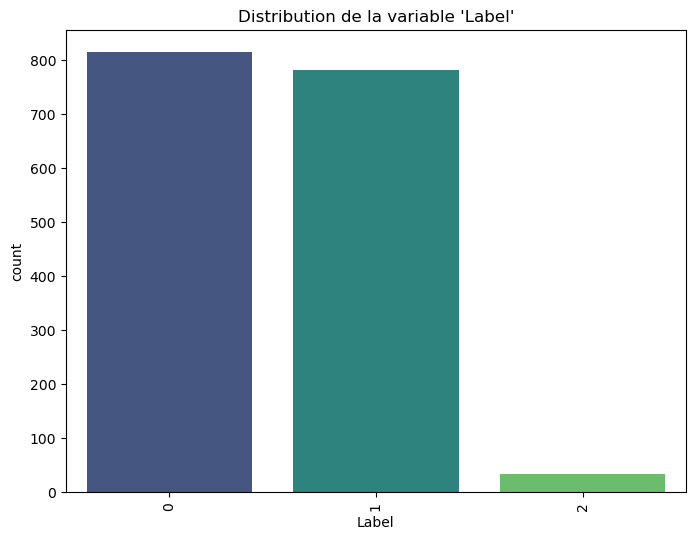


Comptage des occurrences des classes pour 'Label':

Label
0    1692
2    1655
1    1653
Name: count, dtype: int64

Pourcentage des classes pour 'Label':

Label
0    33.84
2    33.10
1    33.06
Name: proportion, dtype: float64


In [18]:
taa.plot_class_distribution(data, 'Label')

Les comptages ne sont pas raccord avec le graphique ???

## Split Features & Label

In [20]:
X, y = taa.split_feature_label(data, 'Label')

Les features sont dans le dataframe X (5000 lignes, 40 colonnes).
La target est dans la série y (5000 lignes, 1 colonnes).


In [21]:
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.63,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,0.31,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.93,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,1.18,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,-0.07,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.44,0.56,1.84,1.94,3.43,4.88,4.04,2.11,1.83,0.78,...,0.52,-2.56,-0.68,0.97,-0.78,-1.14,0.45,0.18,1.44,1.11
4996,1.18,-0.48,1.81,1.51,1.41,3.61,3.75,3.80,3.44,3.71,...,-0.41,0.37,-1.96,-1.19,-1.08,1.37,-1.02,0.71,-0.10,0.36
4997,0.64,0.81,-0.38,-0.88,1.55,0.10,0.42,-0.93,-0.70,1.54,...,0.49,1.61,-0.81,-1.35,-0.84,-0.64,1.19,-0.38,-0.70,-0.85
4998,0.18,1.65,1.91,2.07,4.28,3.61,4.46,4.62,4.80,0.25,...,0.17,-0.65,-0.73,0.89,-0.97,-1.30,-0.20,-0.63,-0.92,0.63


In [22]:
y

0       2
1       0
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    2
4998    0
4999    0
Name: Label, Length: 5000, dtype: int64

## Split train test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)


In [24]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
4585,-1.84,-0.87,-0.00,1.68,-0.18,-0.02,1.97,0.09,0.07,1.10,...,-0.27,0.96,1.21,0.84,-0.50,0.32,1.02,0.39,-1.20,-0.91
2221,2.37,-0.92,-1.58,-0.31,-0.24,1.13,-0.24,2.72,4.57,3.64,...,-0.88,-0.82,1.16,0.45,2.92,-0.01,-0.02,1.85,-0.86,1.38
2590,-0.17,1.99,-0.70,2.11,1.58,3.41,3.35,3.01,3.10,3.13,...,-1.01,-0.65,-1.68,1.39,-0.76,-0.40,-1.39,1.56,0.66,-0.96
1024,1.26,0.15,0.20,2.93,0.73,2.44,1.26,1.81,1.96,-0.80,...,2.32,-0.63,0.54,0.42,-0.44,0.54,0.74,0.27,0.77,-2.12
2236,-0.92,1.32,1.56,1.89,2.31,3.16,6.64,3.65,5.09,4.12,...,-0.98,0.42,-0.46,0.40,0.12,-0.29,-0.63,-1.43,1.25,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,0.50,-1.80,1.11,-1.15,-0.07,-0.38,0.14,0.55,1.37,2.12,...,-1.41,1.48,-1.57,-0.63,0.89,0.27,-0.21,-0.48,-1.07,-0.85
1539,-1.04,0.93,-0.07,0.16,0.46,0.88,1.07,-0.92,1.02,0.43,...,0.18,-0.79,-0.92,0.17,0.02,0.42,0.38,0.76,0.51,-0.56
1682,0.03,-0.73,1.81,1.47,1.52,3.91,5.50,3.09,3.78,3.36,...,-0.19,1.79,-0.47,0.23,-0.17,-1.50,-0.02,-2.04,-0.34,0.28
4343,-1.52,-0.60,1.44,0.98,1.27,3.88,0.67,0.01,2.10,2.28,...,1.43,-0.85,-0.84,-1.58,-0.14,-1.35,-0.21,-1.87,-0.40,1.18
